<a href="https://colab.research.google.com/github/ErrorNginx/My-project-google-colab/blob/main/Data%20Analysis%20Titanic%20/%20Data_Analysis_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis

Hi Saya Agus mahari.. Disini saya akan coba sedikit sharing2 tentang proses Exploratory Data Analysis (EDA).. terhadap data Titanic.. Tujuan dari EDA ini untuk melihat variable mana yg paling berkorelasi dengan data Survived..

In [ ]:
#import package yang diperlukan

import pandas as pd

In [ ]:
#buat data frame kemudian load dataset nya
#disini dataset yg digunakan adalah data Titanic.csv

df = pd.read_csv('data/Titanic.csv')

In [ ]:
#tampilkan dataset yg sudah diload

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#indeks bawaan pandas dimulai dari nol
#sementara indeks dataset dari column PassengerId dimulai dari satu
#maka kita akan gunakan indeks dataset dari column PassengerId

df = pd.read_csv('data/Titanic.csv', index_col=0)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#periksa kondisi data
#Int64Index menampilkan jumlah seluruh data yg di entry
#non null count adalah jumlah data yg di entry yg tidak null
#Dtype adalah type data dari column tersebut

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


In [ ]:
#menampilkan perhitungan dari column dataset yang bertype integer atau float

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#tampilkan value unique apa saja yg ada dalam column tersebut
#misalnya dari column Sex

df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
#tampilkan jumlah value unique dalam column tersebut

df.Sex.nunique()

2

In [ ]:
#tampilkan proporsi dari data unique nya untuk tipe data categoric

df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#tampilkan jumlah baris dan jumlah column dari dataset

df.shape

(891, 11)

In [ ]:
#drop data yg duplicate dari dataset

df.drop_duplicates().shape

(891, 11)

# Embarked

In [ ]:
#jumlah seluruh data entry adalah 891, sementara column Embarked berjumlah 889
#artinya terdapat data null pada column Embarked 
#kita periksa di lokasi manakah data null tersebut

df.Embarked[df.Embarked.isnull()]

PassengerId
62     NaN
830    NaN
Name: Embarked, dtype: object

In [ ]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
#tampilkan proporsi dari data column Embarked
#ternyata data column Embarked berupa data categoric

df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#bila kita akan melakukan imputation pada column Embarked
#maka kita periksa type data column Embarked terlebih dahulu
#data column Embarked berupa data categoric maka imputation nya menggunakan mode nya
#dari proporsi column Embarked itu S adalah data yang paling sering muncul maka S adalah mode nya

In [ ]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

In [ ]:
#setelah dilakukan imputation terlihat bahwa proporsi nya sudah berubah

df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#column Embarked masih berupa type data Object
#untuk memudahkan proses analisis maka kita akan convert type object menjadi type numeric

df.Embarked = df.Embarked.map({'S':0,'C':1,'Q':2})

In [ ]:
#tampilkan info dataset untuk melihat apakah column Embarked sudah berubah type data nya
#ternyata column Embarked sekarang sudah berubah type data nya menjadi numeric

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 69.6+ KB


# Age

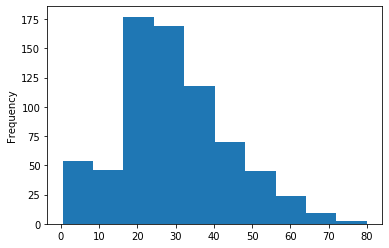

In [ ]:
#jumlah seluruh data entry adalah 891, sementara column Age berjumlah 714
#artinya terdapat data null pada column Age
#kita akan lakukan imputation pada column Age
#untuk menentukan methods apa yg akan kita gunakan dalam imputation column Age
#maka kita tampilkan histogram column Age

df.Age.plot(kind='hist');

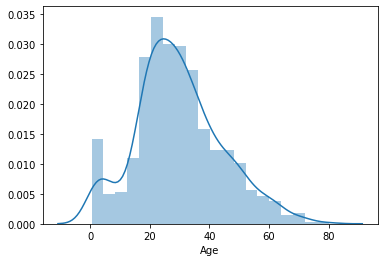

In [ ]:
import seaborn as sns
sns.distplot(df['Age'])

In [ ]:
#karna column Age berdistribusi skewness 
#maka kita akan lakukan imputation pada column Age dengan menggunakan median

val = df.Age.median()
df['Age'] = df.Age.fillna(val)

In [ ]:
#tampilkan info dataset untuk melihat apakah column Age sudah ter imputation
#ternyata column Age sekarang sudah berubah jumlah nya

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 69.6+ KB


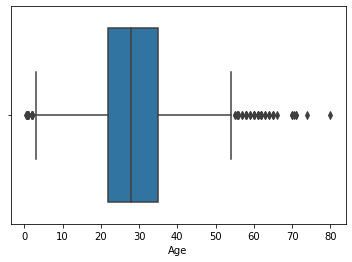

In [ ]:
#untuk melihat visualisasi outliers pada column Age

sns.boxplot(df['Age'])

# Cabin

In [ ]:
#jumlah seluruh data entry adalah 891, sementara column Cabin berjumlah 204
#artinya terdapat data null pada column Cabin

In [ ]:
#tampilkan proporsi dari data column Cabin

df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
E101           3
              ..
C62 C64        1
B69            1
A16            1
C111           1
D46            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
#terlihat bahwa value column Cabin terlalu banyak data unique nya
#dan juga info column Cabin tidak terlalu informatif untuk mengetahui data Survived
#maka kita akan hapus column Cabin

df.drop('Cabin', axis=1, inplace = True)

In [ ]:
#tampilkan info dataset untuk melihat apakah column Cabin sudah terhapus
#ternyata column Cabin sekarang sudah tidak muncul

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 66.1+ KB


# Name

In [ ]:
#terlihat bahwa value column Name terlalu banyak data unique nya
#dan juga info column Name tidak terlalu informatif untuk mengetahui data Survived
#maka kita akan hapus column Name

df.drop('Name', axis=1, inplace = True)

In [ ]:
#tampilkan info dataset untuk melihat apakah column Name sudah terhapus
#ternyata column Name sekarang sudah tidak muncul

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


# Sex

In [ ]:
#column Age masih berupa type data Object
#untuk memudahkan proses analisis maka kita akan convert type object menjadi type numeric

df.Sex = df.Sex.map({'male':0,'female':1})

In [ ]:
#tampilkan info dataset untuk melihat apakah column Age sudah berubah type data nya
#ternyata column Age sekarang sudah berubah type data nya menjadi numeric

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 66.1+ KB


# Ticket

In [ ]:
#terlihat bahwa value column Ticket terlalu banyak data unique nya
#dan juga info column Ticket tidak terlalu informatif untuk mengetahui data Survived
#maka kita akan hapus column Ticket

df.drop('Ticket', axis=1, inplace = True)

In [ ]:
#tampilkan info dataset untuk melihat apakah column Ticket sudah terhapus
#ternyata column Ticket sekarang sudah tidak muncul

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


# Visualisasi Data Survived

In [ ]:
#untuk melakukan visualisasi, import package-package yg diperlukan

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
#kita akan coba visualisasi data Survived
#kita tampilkan terlebih dahulu proporsi data Survived

df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

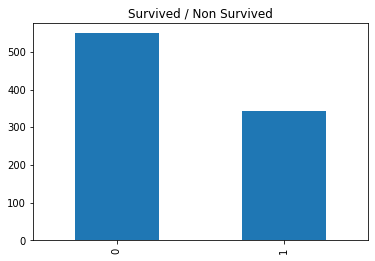

In [ ]:
#kemudian kita tampilkan visualisasi nya

df.Survived.value_counts().plot(kind='bar');
plt.title('Survived / Non Survived');

In [ ]:
#kita akan buat data frame dari column Survived

df_survived = pd.DataFrame(df.Survived.value_counts())

In [ ]:
df_survived['Status']=[0,1]

In [ ]:
df_survived

,Survived,Status
0,549,0
1,342,1


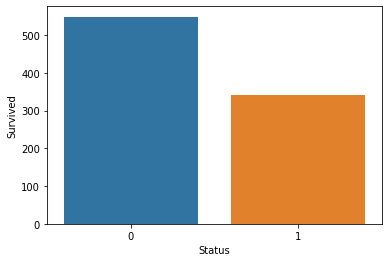

In [ ]:
#kemudian kita tampilkan visualisasi nya

sns.barplot(x='Status',y='Survived', data=df_survived);

In [ ]:
#bisa juga kita ganti keterangan status nya

df_survived2 = pd.DataFrame(df.Survived.value_counts())
df_survived2['Status']=['dies','alive']
df_survived2

,Survived,Status
0,549,dies
1,342,alive


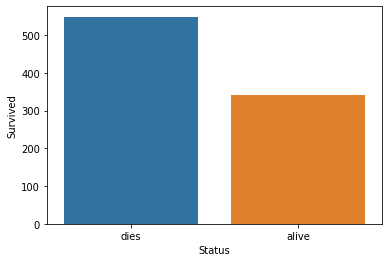

In [ ]:
sns.barplot(x='Status',y='Survived', data=df_survived2);

# Sekian

Sekian dulu sedikit sharing2 kali ini ya.. Terima kasih ^^